In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

Load data - we will use the Pima Indian Diabetes dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

filedir = '/content/drive/MyDrive/Teaching/FWE458_Spring2024/Lec19/'
fname = filedir + "diabetes.csv"

Mounted at /content/drive


In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv(fname, header=1, names=col_names)
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


## Feature Selection and splitting data
Now divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables). Divide the dataset into a training set and a test set is a good strategy.

In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Build the Decision Tree Model

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


## Evaluate the model

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1 score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7186147186147186
precision: 0.55
Recall: 0.6027397260273972
F1 score: 0.5751633986928105


## Importance of Variable


Feature: 0, Score: 0.08208
Feature: 1, Score: 0.03858
Feature: 2, Score: 0.19535
Feature: 3, Score: 0.10172
Feature: 4, Score: 0.30687
Feature: 5, Score: 0.10979
Feature: 6, Score: 0.16562


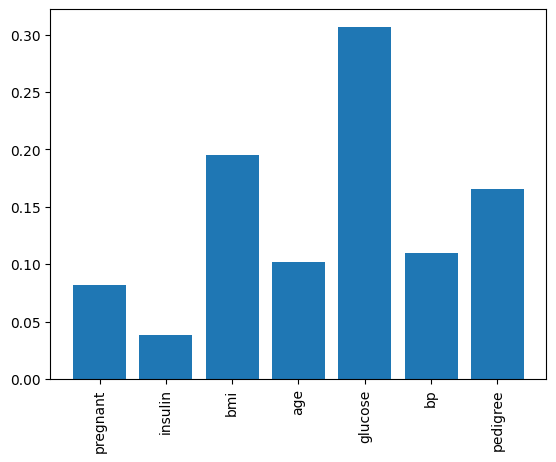

In [ ]:
import matplotlib.pyplot as plt

importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#[x for x in range(len(importance))],
x = range(0,len(importance))
plt.bar(x, importance)
plt.xticks(x, feature_cols, rotation='vertical')
plt.show()

## Visualizing Decision Trees

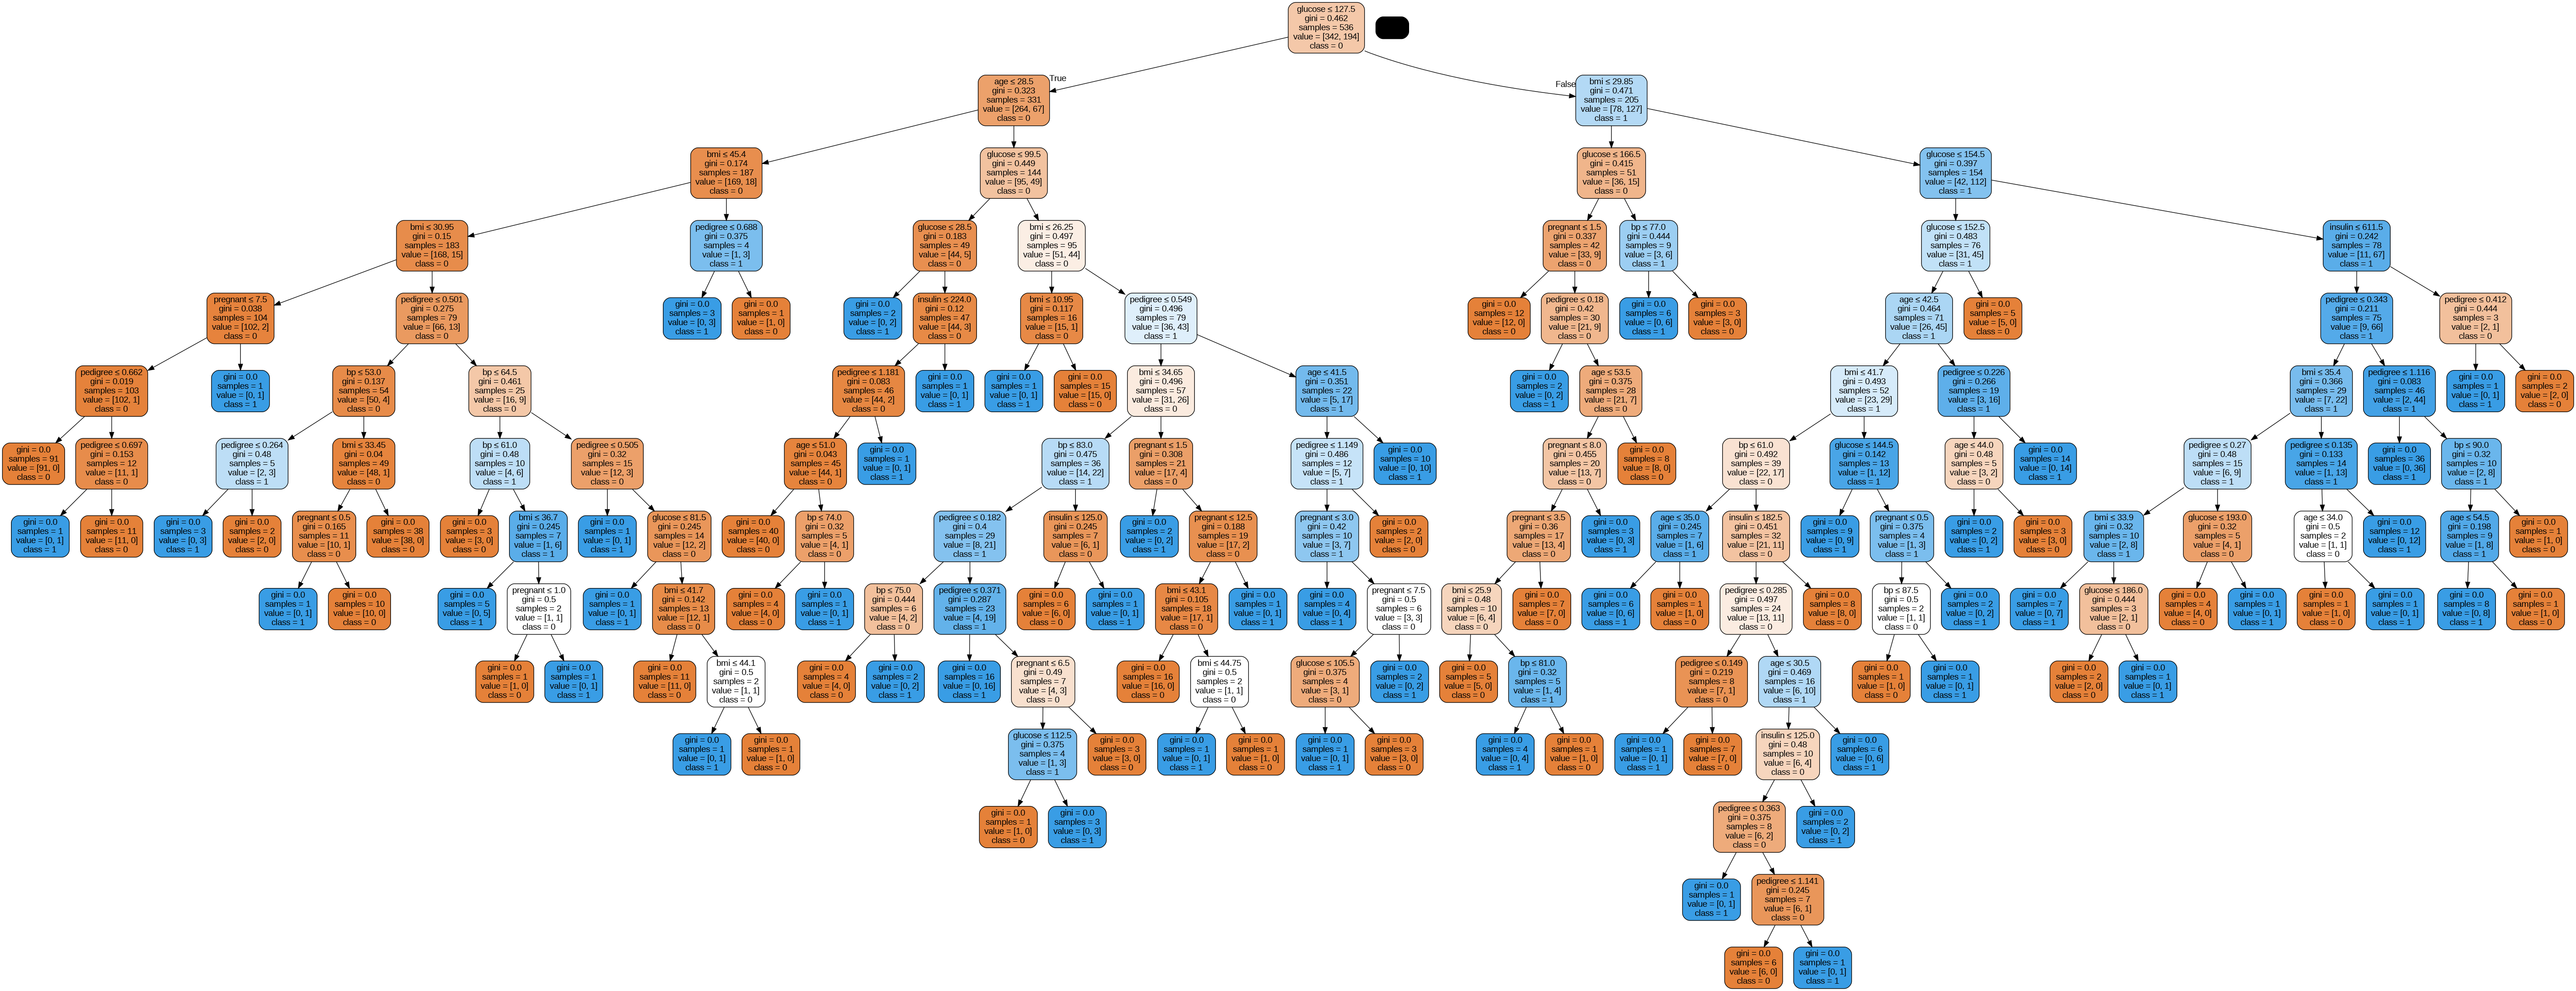

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


## Optimizing Decision Tree Performance
criterion : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6883116883116883


# Homework 8: Naive Bayes and Decision Trees

#### Dataset:
Use the Iris dataset available through the `scikit-learn` library or any other classification dataset of your choice. The Iris dataset contains 150 samples of iris flowers with the following features: sepal length, sepal width, petal length, and petal width, classified into three species.

#### Tasks:

##### Part 1: Data Preparation: Split the dataset into training and testing sets with an 80-20 split.

##### Part 2: Naive Bayes Classification
1. **Model Building**: Using `scikit-learn`, implement the Naive Bayes classifier. Explain your choice of the specific Naive Bayes model (Gaussian, Multinomial, etc.) based on your dataset.
2. **Training**: Train the Naive Bayes model with the training data.
3. **Evaluation**: Evaluate the model on the test data. Calculate and report the accuracy, precision, recall, and F1-score.

##### Part 3: Decision Trees
1. **Model Building**: Implement the Decision Tree classifier using `scikit-learn`. Explain any parameters you chose to tweak and why.
2. **Training**: Train the Decision Tree model with the training data.
3. **Evaluation**: Evaluate the model on the test data. Calculate and report the accuracy, precision, recall, and F1-score. Compare the performance to the Naive Bayes model.

##### Part 4: Comparative Analysis
1. **Feature Importance**: For the Decision Tree model, extract and display the feature importance. Discuss how the most important features align with your understanding of the dataset.
2. **Model Comparison**: Discuss the performance of the Naive Bayes classifier versus the Decision Tree classifier. Consider their accuracy, computational efficiency, and suitability for different types of data.

#### Submission:
Submit your notebook containing:
- Code for each task with appropriate comments explaining your logic.
- Visualizations (where applicable) to support data exploration and results interpretation.
- A concise discussion of your findings and conclusions for the comparative analysis section.